# ДЗ 2. Проверка гипотез

Имя, Фамилия: Тимофей Шумилов

группа: БКНАД222

**Оценка(для проверяющего):** 0 из 32

**Дедлайн:** 24 ноября 23:59 (решение нужно сдать в энитаск)

# Введение. Несколько слов о шахматах

В этом домашнем задании вам будет представлен набор данных связанных с шахматами. Напомним, что шахматная партия может заканчиваться одним из трёх исходов:
- Победа белых (записывается как 1-0)
- Победа чёрных (записывается как 0-1)
- Ничейный исход (записывается как 1/2-1/2)

Также, в соревновательных шахматах есть временной контроль: партии делятся на несколько категорий, в зависимости от того, сколько времени оппонненты имеют на размышления:
- Блиц (до 10 минут на все ходы, возможно с добавлением времени после каждого хода)
- Рапид (от 10 до 30 минут на все ходы, возможно с добавлением времени после каждого хода)
- Классические или медленные шахматы (от 30 минут на все ходы, часто с добавлением времени после 40 и 60 ходов)

Для того чтобы как-то классифицировать силу игроков, была введена рейтинговая система ELO, на основании которой игрокам присуждается ранг (например международный мастер или гроссмейстер) и формируются турниры. Отметим что рейтинг ELO меняется, в зависимости от того, в каком формате временного контроля игрок участвует (т.е. у одного человека разный рейтинг для блица, рапида и классических шахмат). 

В этом датасете собраны основные данные об шахматных партиях, сыгранными за период с 1980 по 2021 года.
- Представлены партии всех трех форматов, формат партии указан в поле ``control``
- Исход партии представлен в поле ``result``
- Рейтинги оппонентов записаны в полях ``elo_white`` и ``elo_black`` для рейтинга играющих за белых и за черных соответственно.  
    - Поле ``elo_average`` содержит среднее значение ``elo_white`` и ``elo_black`` -- _усредненный рейтинг (оппонентов)_. 
    - Поле ``elo_difference`` содержит в себе значение ``elo_white - elo_black``. 
- Поле ``opening`` содержит одно из пяти значений ``'A', 'B', 'C', 'D', 'E'``, которое кодирует информацию о нескольких первых ходах в партии (см. задачу 3 для деталей). 
- В поле ``length`` записано число сделанных ходов в партии. Обратите внимание, что ход -- это движение одной фигуры со стороны белых **и** движение одной фигуры со стороны чёрных, т.е. за один ход и белые и черные совершают по действию.
- Поля ``date`` и ``site`` содержат информацию о том, в каком году была сыграна партия и место её проведения соответственно. 

## Обзор данных (2 балла)
В этой секции вам предлагается познакомиться с данными. Посмотрите на три разных формата временного контроля. Сравните как в каждом из них 
- Распределены исходы партий (победа белых/победа чёрных/ничья)
- Распределены усреднённые рейтинги оппонентов партий 
- Распределены длительности партий 

**Бонус (max 3 дополнительных балла)** При желании, можно также посмотреть другие вещи --- например как менялось количество партий по декадам или пятилеткам. Попробуйте обнаружить и _объяснить_ интересные и статистически значимые феномены.  

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.precision', 5)
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

#add your imports if necessary

In [2]:
games_df = pd.read_csv("games.csv")
games_df.head()

,result,control,elo_white,elo_black,elo_average,elo_difference,length,opening,date,site
0,1/2-1/2,slow,2380,2330,2355.0,50,25,C,1980,Prague
1,1/2-1/2,slow,2425,2545,2485.0,-120,104,E,1980,Prague
2,0-1,slow,2445,2410,2427.5,35,85,C,1980,Prague
3,0-1,slow,2435,2445,2440.0,-10,82,D,1980,Prague
4,1/2-1/2,slow,2410,2380,2395.0,30,16,A,1980,Prague


In [6]:
games_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767540 entries, 0 to 5767539
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   result          object 
 1   control         object 
 2   elo_white       int64  
 3   elo_black       int64  
 4   elo_average     float64
 5   elo_difference  int64  
 6   length          int64  
 7   opening         object 
 8   date            int64  
 9   site            object 
dtypes: float64(1), int64(5), object(4)
memory usage: 440.0+ MB


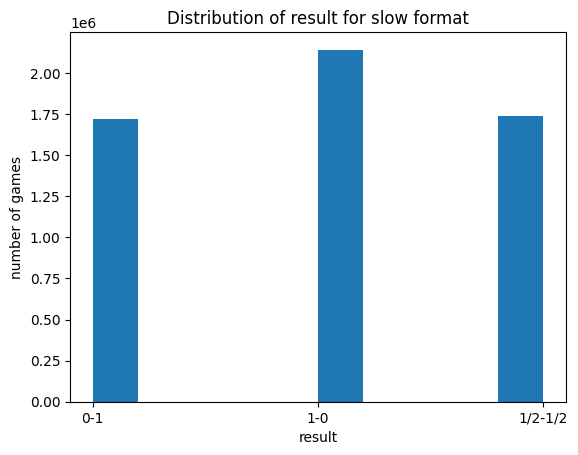

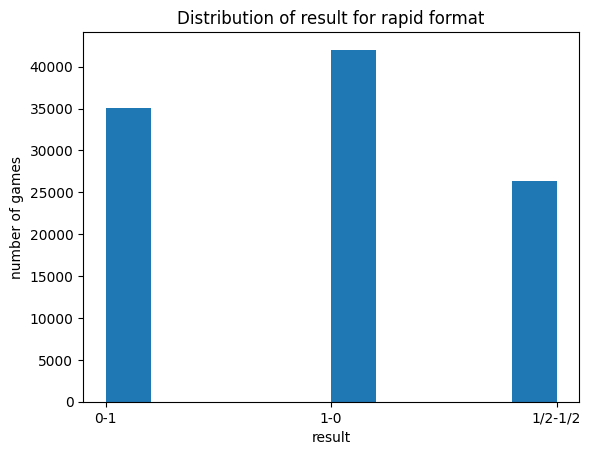

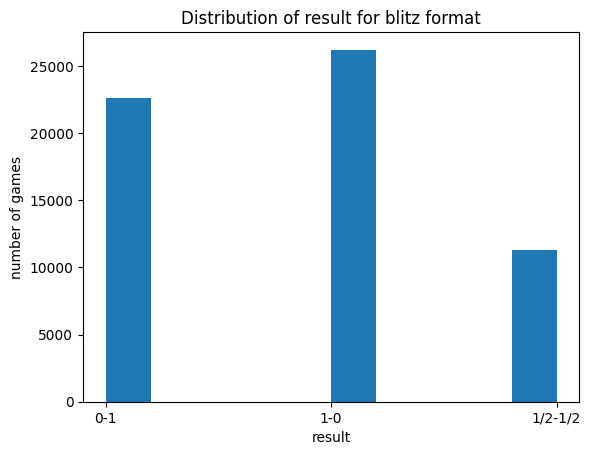

In [18]:
# plot results distribution dependent on the control
for control_format in ['slow', 'rapid', 'blitz']:
    for feature in ['result']:
        plt.hist(games_df[games_df["control"] == f'{control_format}'][f'{feature}'].sort_values())
        plt.xlabel(f'{feature}')
        plt.ylabel('number of games')
        plt.title(f'Distribution of {feature} for {control_format} format')
        plt.show()

Видно, что в разных временных форматах совершенно разное распределение исходов партий. Это указывает нам на то что надо завести три различных набора данных и работать с каждым по отдельности:

In [9]:
slow  = games_df[games_df["control"] == "slow"]
rapid = games_df[games_df["control"] == "rapid"]
blitz = games_df[games_df["control"] == "blitz"]

Постройте для каждого из контролей распределение усредненного рейтинга партий и длин партий.

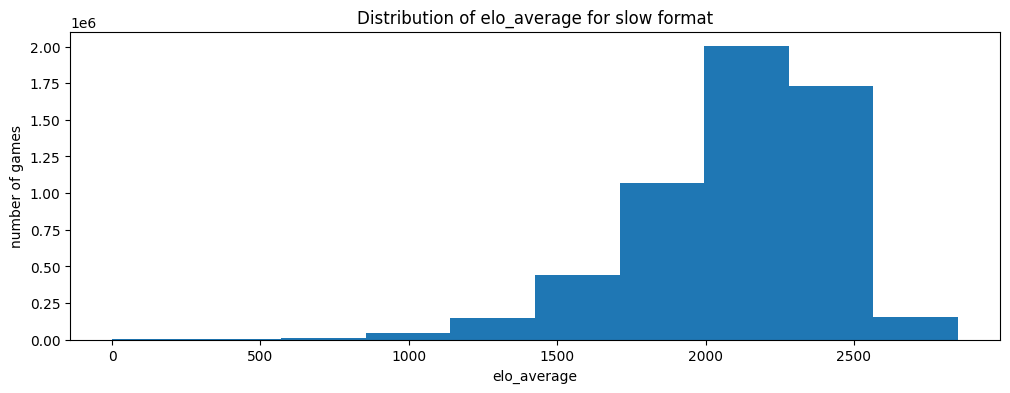

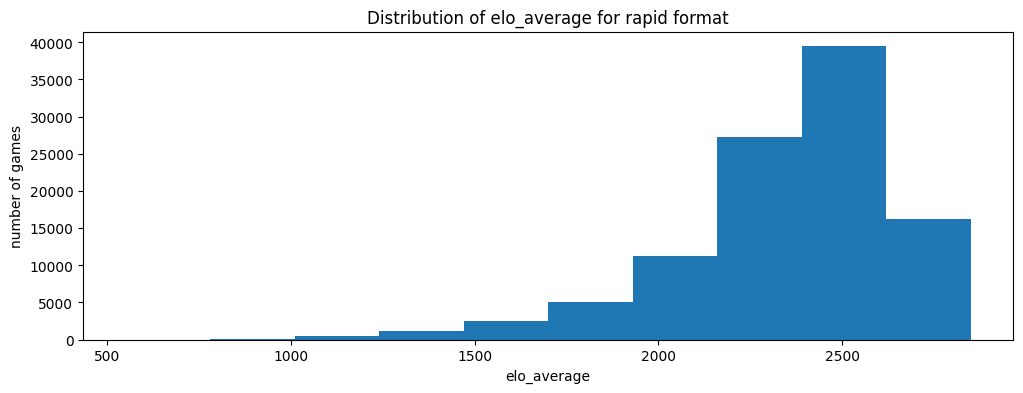

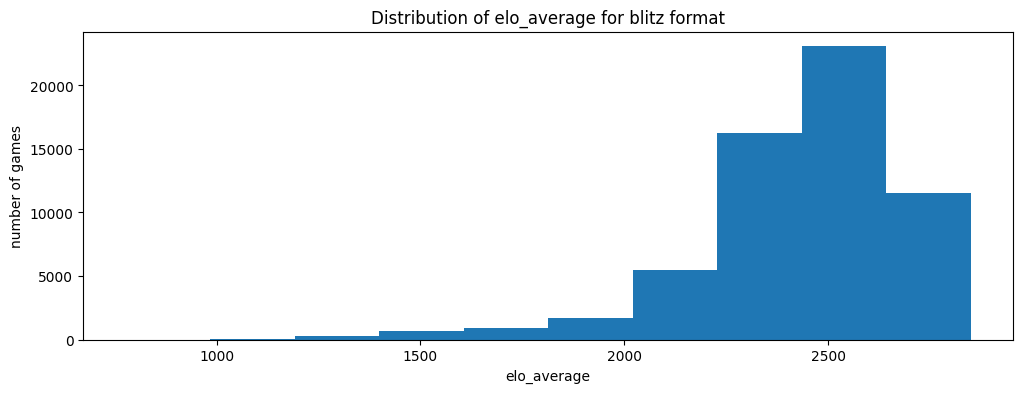

In [36]:
for feature in ['elo_average']:
    for control_format in ['slow', 'rapid', 'blitz']:
        plt.hist(games_df[games_df["control"] == f'{control_format}'][f'{feature}'].sort_values())
        plt.rcParams['figure.figsize'] = [12, 4]
        plt.xlabel(f'{feature}')
        plt.ylabel('number of games')
        plt.title(f'Distribution of {feature} for {control_format} format')
        plt.show()

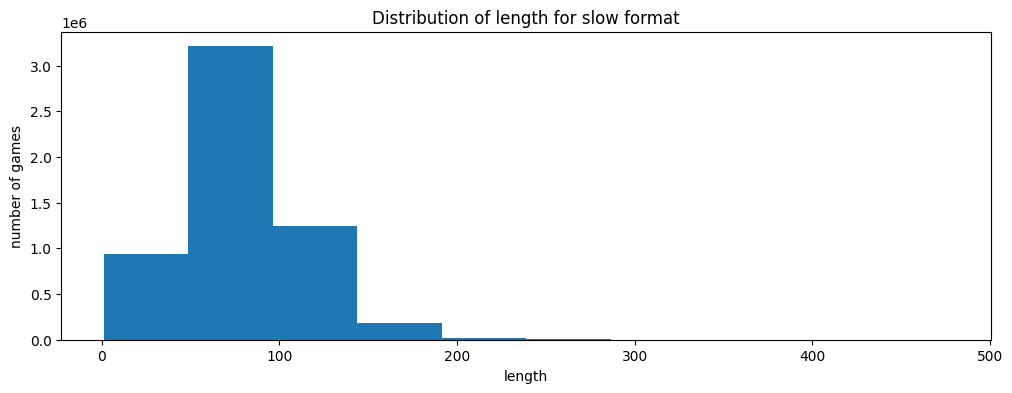

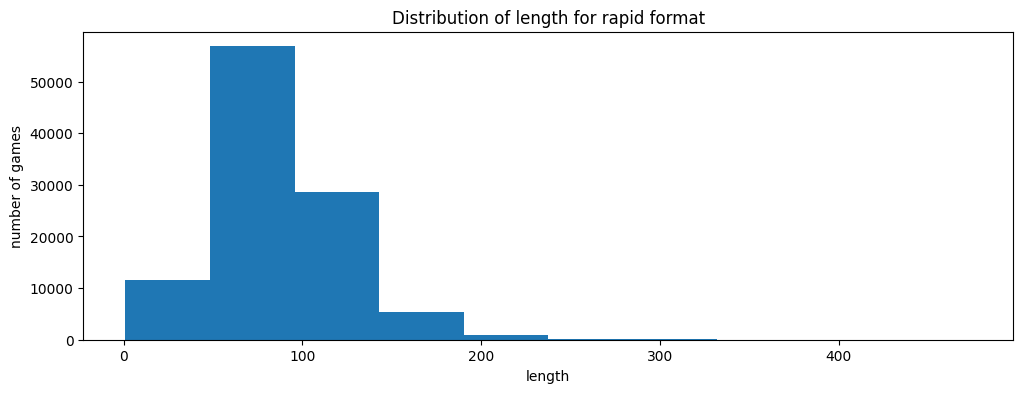

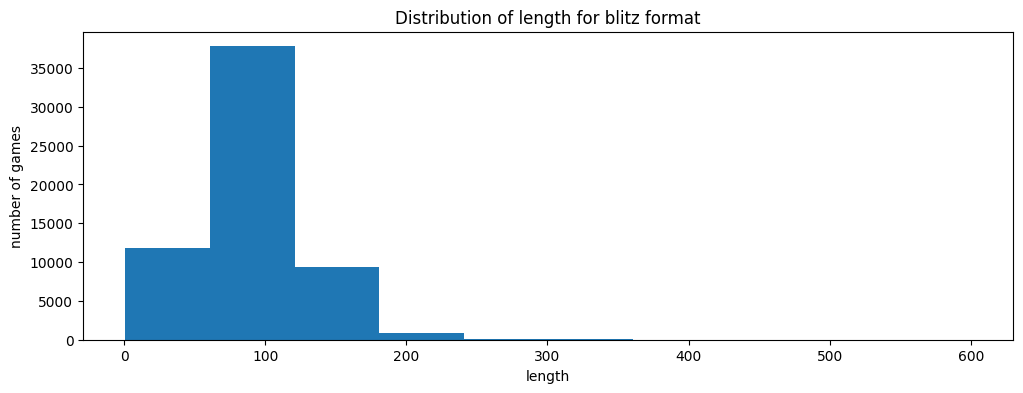

In [37]:
for feature in ['length']:
    for control_format in ['slow', 'rapid', 'blitz']:
        plt.hist(games_df[games_df["control"] == f'{control_format}'][f'{feature}'].sort_values())
        plt.xlabel(f'{feature}')
        plt.ylabel('number of games')
        plt.title(f'Distribution of {feature} for {control_format} format')
        plt.show()

# Задачи

## Разминка. Проверка гипотез о средних (5 баллов)

### Взгляд в прошлое. Рейтинг игр в Праге. (2 балла)
Пусть $X_1, \ldots, X_n \overset{\text{i.i.d}}{\sim} X$ --- выборка из некоторого распределения. Вспомните как строится асимптотический доверительный интервал для $\mathbb{E}[X]$, и, используя асимптотический z-test проверьте на уровне значимости $\alpha = 0.05$ гипотезу о том что математическое ожидание рейтинга партии равно 2389:
$$
    H_0 : \mathbb{E}[X] = 2389 \\
    H_1 : \mathbb{E}[X] \neq 2389
$$
для игр, сыгранных в Праге за период 1980-1989 г.

ВАШЕ РЕШЕНИЕ И МЫСЛИ ТУТ

In [3]:
from numpy.typing import ArrayLike
from typing import Tuple, Optional, Literal

hypothesis_side = Literal["both", "left", "right"]


class StatTestResult:
    """
    Wrapper that carries information about performed statistical test. 
    
    Attributes
    ----------
    statistics : float
        value of the test's statistics.
    p_value : float
        obtained p-value for the test's statistics.
    significance : float
        significance level for the performed test
    critical_value : float
        critical value of the test's statistics for the given significance level 
    test_name : str
        name of the test
    null_name: str
        formulation of the null hypothesis
    alternative_name : str
        formulation of the alternative hypothesis
    verdict: 
        test's verdict
    """
    def __init__(self, statistics : float, p_value : float, significance : float, critical_value : float,\
                        test_name : str, null_name : str, alternative_name : str):
        self.statistics = statistics
        self.p_value = p_value
        self.significance = significance
        self.critical_value = critical_value
        self.name = test_name
        self.null = null_name
        self.alternative = alternative_name
        
        if self.p_value < self.significance:
            self.verdict = f"Reject H0 at significance level {significance}"
        else:
            self.verdict = f"Accept H0 at significance level {significance}"

    def __repr__(self):
        return f"""
        {self.name}. 
        H0: {self.null}
        H1: {self.alternative}
        ===================================
        Statistics value: {self.statistics}. Critical value: {self.critical_value}
        P-value: {self.p_value}, 
        Verdict: {self.verdict}
        """
    def __str__(self):
        return f"Statistics: {self.statistics}, P-value: {self.p_value}"

In [57]:
def z_test_one_sample(sample : ArrayLike, null_mean : float,
                      significance : float = 0.05, tail : hypothesis_side = 'both') -> StatTestResult:
    """
        Performs asymptotic z-test for the one sample
        
        Parameters
        ----------
        sample : ArrayLike
            sample on which z-test will be performed 
        null_mean : float
            value of mean under null hypothesis.
        significance : float
            significance level for the performed test
        tail : Literal["both", "left", "right"]
            alternative side
            
        Returns
        -------
        res : StatTestResult
            An object containing infomration about test results
    """
    z_score = np.sqrt(len(sample)) * (sample.mean() - null_mean) / np.sqrt(stats.tvar(sample))
    
    if tail == 'both':
        p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
        critical_value = stats.norm.ppf(1 - significance / 2)
        return StatTestResult(z_score,
                              p_value,
                              significance,
                              critical_value,
                              f'Is data distributed with mean = {null_mean}',
                              f'Data is distributed with mean = {null_mean}',
                              f'Data is distibuted with mean != {null_mean}'
                             )
    elif tail == 'right':
        p_value = 1 - stats.norm.cdf(z_score)
        critical_value = stats.norm.ppf(1 - significance)
        return StatTestResult(z_score,
                              p_value,
                              significance,
                              critical_value,
                              f'Is data distributed with mean = {null_mean}',
                              f'Data is distributed with mean = {null_mean}',
                              f'Data is distibuted with mean > {null_mean}'
                             )
    elif tail == 'left':
        p_value = stats.norm.cdf(z_score)
        critical_value = -stats.norm.ppf(1 - significance)
        return StatTestResult(z_score,
                              p_value,
                              significance,
                              critical_value,
                              f'Is data distributed with mean = {null_mean}',
                              f'Data is distributed with mean = {null_mean}',
                              f'Data is distibuted with mean < {null_mean}'
                             )

In [58]:
data = games_df.loc[(games_df['date'].between(1980, 1989)) & (games_df['site'] == 'Prague'), 'elo_average']
z_test_one_sample(data, 2389)


        Is data distributed with mean = 2389. 
        H0: Data is distributed with mean = 2389
        H1: Data is distibuted with mean != 2389
        Statistics value: 0.050294112520269385. Critical value: 1.959963984540054
        P-value: 0.9598880153624181, 
        Verdict: Accept H0 at significance level 0.05
        

**Заключение**: Поскольку мы допускаем H0, можно считать, что данные действительно распределены со средним 2389

### Назад в будущее. Рейтинг игр в Москве. (3 балла)
После того как вы проверили эту гипотезу, проверьте гипотезу о том, что средний рейтинг классических партий проводимых в Москве в 2010-2019 годах выше, чем рейтинг в 2000-2009 годах. Вспомните как устроен z-тест для двух выборок и 
1. сформулируйте нулевую гипотезу и альтернативу;
2. укажите статистику и её распределение при верной нулевой гипотезе;
3. реализуйте тест и проверьте гипотезу на уровне значимости 0.05;

H_0: средний рейтинг игр в Москве 2010-2019 совпадает со средним рейтингом игр в Москве 2000-2009\
H_1: средний рейтинг игр в Москве 2010-2019 выше, чем средний рейтинг игр в Москве 2000-2009\
$
Статистика:\ Z = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{\sigma_x^2}{n} + \frac{\sigma_y^2}{m}}} \overset{H_0}{\sim} \mathcal{N}(0, 1),\ n = |X|,\ m = |Y|
$

In [61]:
def z_test_two_sample(sample_x : ArrayLike, sample_y : ArrayLike, null_mean_diff : float = 0,
                      significance : float = 0.05, tail : hypothesis_side = 'both') -> StatTestResult:
    """
        Performs asymptotic z-test for the two samples
        
        Parameters
        ----------
        sample_x : ArrayLike
            first sample for the z-test 
        sample_y : ArrayLike
            second sample for the z-test
        null_mean_diff : float
            differences of means under null hypothesis.
        significance : float
            significance level for the performed test
        tail : Literal["both", "left", "right"]
            alternative side
            
        Returns
        -------
        res : StatTestResult
            An object containing infomration about test results
    """
    z_score = ((sample_x.mean() - sample_y.mean()) /
               np.sqrt(stats.tvar(sample_x) / len(sample_x) + stats.tvar(sample_y) / len(sample_y))
              )
    
    if tail == 'both':
        p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
        critical_value = stats.norm.ppf(1 - significance / 2)
        return StatTestResult(z_score,
                              p_value,
                              significance,
                              critical_value,
                              f'Is data distributed with mean_x = mean_y',
                              f'Data is distributed with mean_x = mean_y',
                              f'Data is distibuted with mean_x != mean_y'
                             )
    elif tail == 'right':
        p_value = 1 - stats.norm.cdf(z_score)
        critical_value = stats.norm.ppf(1 - significance)
        return StatTestResult(z_score,
                              p_value,
                              significance,
                              critical_value,
                              f'Is data distributed with mean_x = mean_y',
                              f'Data is distributed with mean_x = mean_y',
                              f'Data is distibuted with mean_x > mean_y'
                             )
    elif tail == 'left':
        p_value = stats.norm.cdf(z_score)
        critical_value = -stats.norm.ppf(1 - significance)
        return StatTestResult(z_score,
                              p_value,
                              significance,
                              critical_value,
                              f'Is data distributed with mean_x = mean_y',
                              f'Data is distributed with mean_x = mean_y',
                              f'Data is distibuted with mean_x < mean_y'
                             )

In [62]:
data_x = games_df.loc[(games_df['date'].between(2010, 2019)) & (games_df['site'] == 'Moscow'), 'elo_average']
data_y = games_df.loc[(games_df['date'].between(2000, 2009)) & (games_df['site'] == 'Moscow'), 'elo_average']
z_test_two_sample(data_x, data_y, tail='right')


        Is data distributed with mean_x = mean_y. 
        H0: Data is distributed with mean_x = mean_y
        H1: Data is distibuted with mean_x > mean_y
        Statistics value: -5.56313880343589. Critical value: 1.6448536269514722
        P-value: 0.9999999867517516, 
        Verdict: Accept H0 at significance level 0.05
        

**Заключение**: Поскольку мы допускаем H_0, можно считать, что средний рейтинг игр в Москве 2010-2019 совпадает со средним рейтингом игр в Москве 2000-2009

## Задача 1. Инфляция рейтинга (5 баллов)

В течение времени правила подсчета рейтинга менялись. Для сравнения возьмем партии в классическом временном контроле и их рейтинги за периоды 2000-2009 года и 2010-2019 год. Нарисуйте гистограммы, которые описывают распределение усредненных рейтингов оппонентов в партиях за эти периоды.

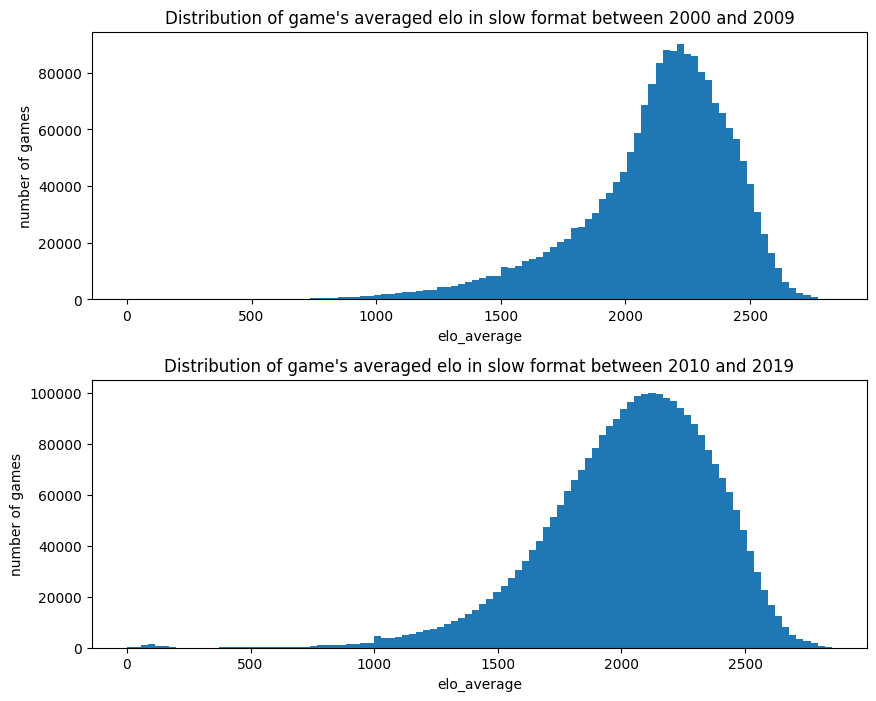

In [156]:
fig, axs = plt.subplots(2, 1, figsize = (10, 8))

axs[0].set_title('Distribution of game\'s averaged elo in slow format between 2000 and 2009')
axs[1].set_title('Distribution of game\'s averaged elo in slow format between 2010 and 2019')

axs[0].hist(games_df.loc[games_df['date'].between(2000, 2009) & (games_df['control'] == 'slow'), 
                         'elo_average'
                        ], bins=100)
axs[0].set_xlabel('elo_average')
axs[0].set_ylabel('number of games')

axs[1].hist(games_df.loc[games_df['date'].between(2010, 2019) & (games_df['control'] == 'slow'),
                         'elo_average'
                        ], bins=100)
axs[1].set_xlabel('elo_average')
axs[1].set_ylabel('number of games')

plt.subplots_adjust(hspace=0.3)

plt.show()

Распространено мнение, что в силу изменений правил подсчета, высокий рейтинг стало получить легче --- произошла инфляция рейтинга. Проверьте, так ли это на самом деле, с помощью рангового критерия [Уилкоксона-Манна-Уитни](http://www.machinelearning.ru/wiki/index.php?title=Критерий_Уилкоксона-Манна-Уитни). В качестве распределения статистики можете брать подходящую аппроксимацию нормальным распределением с поправкой на повторяющиеся значения. Как и ранее,
1. сформулируйте нулевую гипотезу и альтернативу; объясните смысл математической формулировки нулевой гипотезы;
2. укажите статистику и её распределение при верной нулевой гипотезе;
3. реализуйте тест и проверьте гипотезу на уровне значимости 0.05;

X из распределения среднего рейтинга в 2000-2009 годах\
Y из распределения среднего рейтинга в 2010-2019 годах\
H_0 : P(Y > X) = 1/2 или median(X - Y) = 0\
H_1 : P(Y > X) > 1/2 или median(X - Y) < 0\
Cмысл нулевой гипотезы заключаются в том, что медиана разности значений средних рейтингов в 2000-2009 и 2010-2019 годах равна 0, то есть средние значения рейтинга в 2010-2019 годах больше средних значений рейтинга в 2000-2009 годах с той же частотой, что и меньше.\
$$
U_x = mn + \frac{1}{2} m (m + 1) - R_x, R_x = \sum\limits_{i = 1}^m r(x_i)\\
Статистика:\\
U = \frac{U_x - \frac{1}{2}mn}{\sqrt{\frac{mn}{12}(m + n + 1 - \frac{\sum\limits_{k=1}^K (t_k^3 - t_k)}{(m + n)(m + n - 1)})}} \sim \mathcal{N}(0, 1),
$$\
К - количество уникальных значений рангов, $t_k$ - количество повторений k ранга для общего вариационного ряда для выборок

In [4]:
from scipy.stats import rankdata # this can help. See docs.

def mwu_test(sample_x : ArrayLike, sample_y : ArrayLike, significance : float = 0.05, tail : hypothesis_side = 'both') -> StatTestResult:
    """        
        Performs Mann–Whitney U-test with correct support for ties in the data. 
        REMARK: Test uses normal approximation for the distribution of test statistics
                under null hypothesis.
    
        Parameters
        ----------
        sample_x : ArrayLike
            first sample for the U-test 
        sample_y : ArrayLike
            second sample for the U-test
        significance : float
            significance level for the performed test
        tail : Literal["both", "left", "right"]
            alternative side
            
        Returns
        -------
        res : StatTestResult
            An object containing infomration about test results
    """
    R = pd.Series(stats.rankdata(np.concatenate((sample_x, sample_y), axis=0), method='average'))
    U_x = (len(sample_x) *
           len(sample_y) +
           1 / 2 *
           len(sample_x) *
           (len(sample_x) + 1) -
           np.sum(R[:len(sample_x)])
          )
    U_y = (len(sample_x) *
           len(sample_y) +
           1 / 2 *
           len(sample_y) *
           (len(sample_y) + 1) -
           np.sum(R[len(sample_x):])
          )
    t = R.value_counts().values
    
    if tail == 'both':
        U = ((min(U_x, U_y) -
              1 / 2 * len(sample_x) * len(sample_y)) /
             np.sqrt(len(sample_x) * len(sample_y) *
                     (len(sample_x) + len(sample_y) + 1 - np.sum(t**3 - t) /
                      (len(sample_x) + len(sample_y)) / (len(sample_x) + len(sample_y) - 1)
                     ) / 12
                    )
            )
        p_value = stats.norm.cdf(U)
        critical_value = -stats.norm.ppf(1 - significance)
        return StatTestResult(U,
                              p_value,
                              significance,
                              critical_value,
                              f'Is data distributed with median(X - Y) = 0',
                              f'Data is distributed with median(X - Y) = 0',
                              f'Data is distibuted with median(X - Y) != 0'
                             )
    elif tail == 'right':
        U = ((U_x -
              1 / 2 * len(sample_x) * len(sample_y)) /
             np.sqrt(len(sample_x) * len(sample_y) *
                     (len(sample_x) + len(sample_y) + 1 - np.sum(t**3 - t) /
                      (len(sample_x) + len(sample_y)) / (len(sample_x) + len(sample_y) - 1)
                     ) / 12
                    )
            )
        p_value = stats.norm.cdf(U)
        critical_value = -stats.norm.ppf(1 - significance)
        return  StatTestResult(U,
                              p_value,
                              significance,
                              critical_value,
                              f'Is data distributed with median(X - Y) = 0',
                              f'Data is distributed with median(X - Y) = 0',
                              f'Data is distibuted with median(X - Y) > 0'
                             )
    elif tail == 'left':
        U = ((U_y -
              1 / 2 * len(sample_x) * len(sample_y)) /
             np.sqrt(len(sample_x) * len(sample_y) *
                     (len(sample_x) + len(sample_y) + 1 - np.sum(t**3 - t) /
                      (len(sample_x) + len(sample_y)) / (len(sample_x) + len(sample_y) - 1)
                     ) / 12
                    )
            )
        p_value = stats.norm.cdf(U)
        critical_value = -stats.norm.ppf(1 - significance)
        return StatTestResult(U,
                              p_value,
                              significance,
                              critical_value,
                              f'Is data distributed with median(X - Y) = 0',
                              f'Data is distributed with median(X - Y) = 0',
                              f'Data is distibuted with median(X - Y) < 0'
                             )
    

In [5]:
X = games_df.loc[games_df['date'].between(2000, 2009) & (games_df['control'] == 'slow'), 
                         'elo_average'
                ]
Y = games_df.loc[games_df['date'].between(2010, 2019) & (games_df['control'] == 'slow'),
                         'elo_average'
                ]
mwu_test(X, Y, tail='left')


        Is data distributed with median(X - Y) = 0. 
        H0: Data is distributed with median(X - Y) = 0
        H1: Data is distibuted with median(X - Y) < 0
        Statistics value: 320.9533549292422. Critical value: -1.6448536269514722
        P-value: 1.0, 
        Verdict: Accept H0 at significance level 0.05
        

**Заключение**: поскольку мы не отвергаем H0, можно сделать вывод, что средние значения рейтинга в 2010-2019 годах чаще меньше или равны средним значениям рейтинга в 2000-2009 годах, чем больше их, то есть инфляции рейтинга не произошло

## Задача 2. Рейтинги и исход партий (7.5 баллов)

Исследуйте как, в зависимости от рейтинга участников, меняется распределение исхода партии. Мы предлагаем вам изучить как
- Разница в рейтинге влияет на шансы на результативный исход (победа одной из сторон)
- С ростом среднего рейтинга участников меняются шансы на победу

### Разрыв рейтинга и шансы на победу (5 баллов)

Нарисуйте гистограммы, показывающее как устроены исходы партий в зависимости от разницы в рейтинге для партий в разных формах временного контролля. 

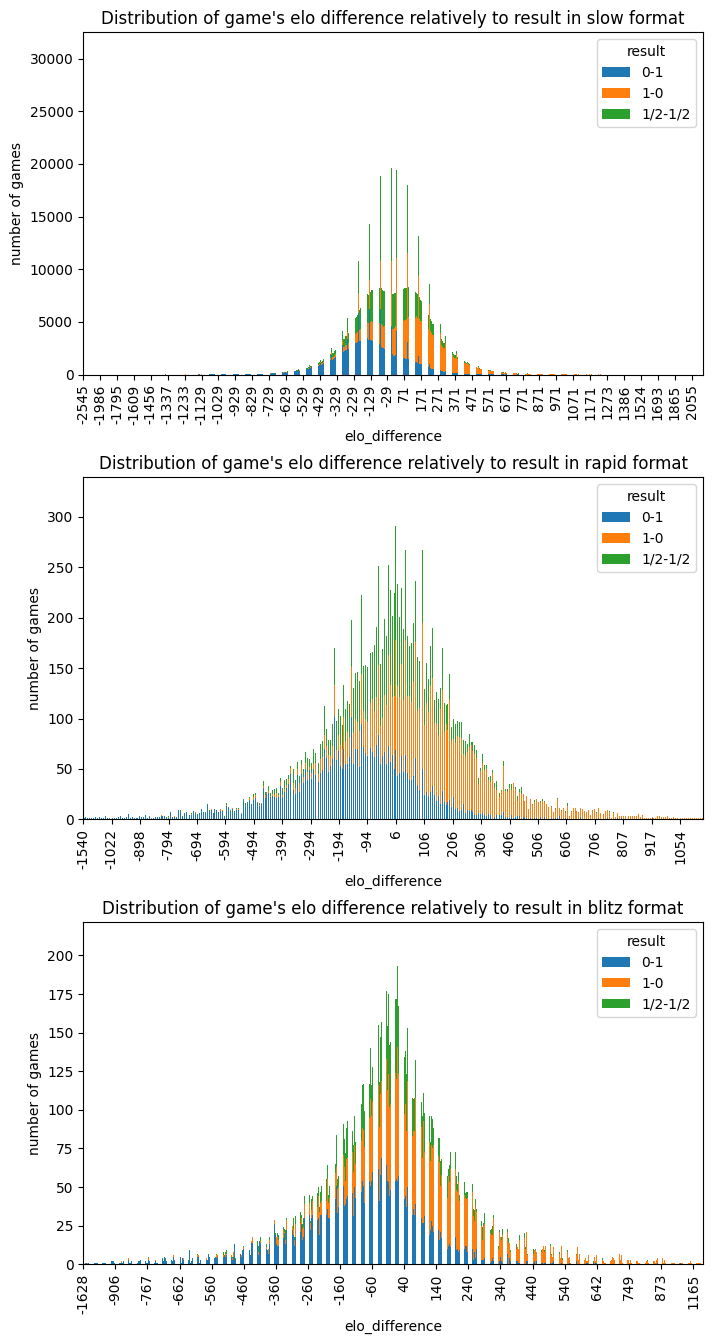

In [44]:
fig, axs = plt.subplots(3, 1, figsize=(8, 16))

axs[0].set_title('Distribution of game\'s elo difference relatively to result in slow format')
axs[1].set_title('Distribution of game\'s elo difference relatively to result in rapid format')
axs[2].set_title('Distribution of game\'s elo difference relatively to result in blitz format')

for idx, control_type in enumerate(['slow', 'rapid', 'blitz']):
    (games_df
     .loc[games_df['control'] == control_type]
     .groupby(['elo_difference', 'result'])
     .size()
     .unstack(fill_value=0)
     .plot(kind='bar', stacked=True, ax=axs[idx])
    )
    axs[idx].set_ylabel('number of games')
    axs[idx].set_xlabel("elo_difference")
    axs[idx].set_xticks(axs[idx].get_xticks()[::100])
    
plt.subplots_adjust(hspace=0.3)

plt.show()

Проверьте гипотезу "симметрии":
> Правда ли что шансы победы белых при разрыве рейтинга между участниками в $X$ пунктов такие же, как шансы на победу чёрных при разрыве рейтинга в $-X$ пунктов?

Для проверки такой гипотезы будем использовать критерий $\chi^2$ для проверки независимости факторов. 
- Подумайте, как должна выглядеть факторная таблица в этом случае?\
Первый столбец - количество побед черных, побед белых, ничьих при условии, что разрыв рейтинга положителен, то есть белые сильнее. Второй столбец - количество побед черных, побед белых, ничьих при условии, что разрыва рейтинга отрицателен, то есть черные сильнее
- Сформулируйте как интерпретировать нулевую гипотезу критерия $\chi^2$ в контексте проверяемой нами гипотезы.
шансы победы белых при разрыве рейтинга между участниками в $X$ пунктов такие же, как шансы на победу чёрных при разрыве рейтинга в $-X$ пунктов
- Реализуйте проверку гипотезы. 

ВАШЕ РЕШЕНИЕ И МЫСЛИ ТУТ

In [9]:
def chi2_contingency(observed : ArrayLike, significance : float = 0.05) -> StatTestResult:
    """
        Performs chi-square independence test test for contingency table
        
        Parameters
        ----------
        observed : ArrayLike
            contingency tablefor the test 
        significance : float
            significance level for the performed test
            
        Returns
        -------
        res : StatTestResult
            An object containing infomration about test results
    """
    X2 = 0
    
    for row in range(observed.shape[0]):
        for column in range(observed.shape[1]):
            expected = np.sum(observed[row, :]) * np.sum(observed[:, column]) / np.sum(observed)
            X2 += (observed[row][column] - expected)**2 / expected
    
    p_value = 1 - stats.chi2.cdf(X2, (observed.shape[0] - 1) * (observed.shape[1] - 1))
    
    critical_value = stats.chi2.ppf(1 - significance, (observed.shape[0] - 1) * (observed.shape[1] - 1)) 
    
    return StatTestResult(X2,
                          p_value,
                          significance,
                          critical_value,
                          f'Are X and Y independent',
                          f'X and Y are independent',
                          f'X and Y are dependent'
                         )

Проверьте сформулированную выше гипотезу для ваших данных:

In [199]:
observed = np.stack((games_df.loc[(games_df['elo_difference'] > 0) &
                                  (games_df['result'] != '1/2-1/2'),
                                  'result'
                                 ].value_counts().sort_index().to_numpy(),
                     games_df.loc[(games_df['elo_difference'] < 0) &
                                  (games_df['result'] != '1/2-1/2'),
                                  'result'
                                 ].value_counts().sort_index().to_numpy()
                    ), axis=0
                   ).T

chi2_contingency(observed)


        Are X and Y independent. 
        H0: X and Y are independent
        H1: X and Y are dependent
        Statistics value: 966467.4988655071. Critical value: 3.841458820694124
        P-value: 0.0, 
        Verdict: Reject H0 at significance level 0.05
        

In [200]:
stats.chi2_contingency(observed, correction=False)

Chi2ContingencyResult(statistic=966467.4988655071, pvalue=0.0, dof=1, expected_freq=array([[ 922875.2839445,  848062.7160555],
       [1145547.7160555, 1052684.2839445]]))

**Заключение**: Поскольку мы отвергаем H0, можно сделать вывод, что шансы победы белых при разрыве рейтинга между участниками в  𝑋  пунктов такие же, как шансы на победу чёрных при разрыве рейтинга в  −𝑋  пунктов

### Средний рейтинг и распределение исходов (2.5 балла)
Существует распространеное мнение, что чем выше рейтинг участников партии, тем более вероятно, что итогом партии станет ничья. Постройте гистограммы показывающее как устроены исходы партий в зависимости от рейтинга партии (``elo_average``) для партий в разных формах временного контролля. 

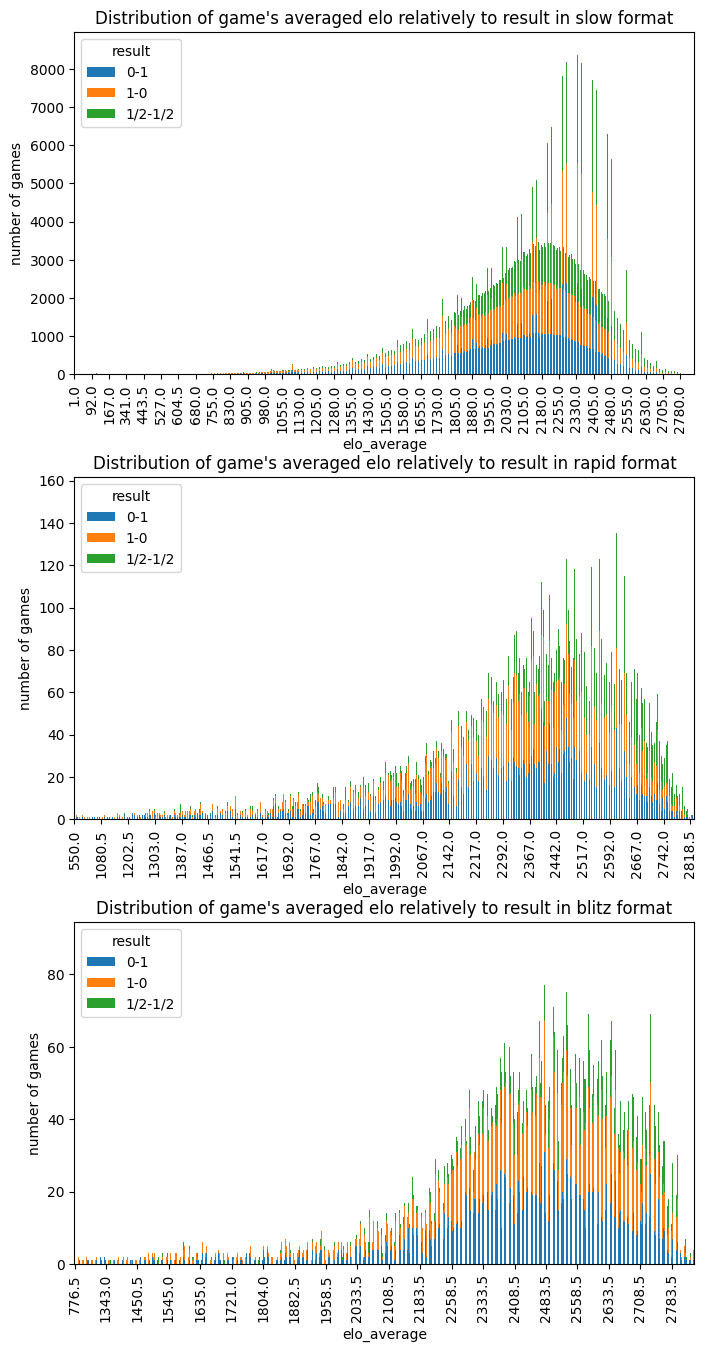

In [51]:
fig, axs = plt.subplots(3, 1, figsize=(8, 16))

axs[0].set_title('Distribution of game\'s averaged elo relatively to result in slow format')
axs[1].set_title('Distribution of game\'s averaged elo relatively to result in rapid format')
axs[2].set_title('Distribution of game\'s averaged elo relatively to result in blitz format')

for idx, control_type in enumerate(['slow', 'rapid', 'blitz']):
    (games_df
     .loc[games_df['control'] == control_type]
     .groupby(['elo_average', 'result'])
     .size()
     .unstack(fill_value=0)
     .plot(kind='bar', stacked=True, ax=axs[idx])
    )
    axs[idx].set_ylabel('number of games')
    axs[idx].set_xlabel("elo_average")
    axs[idx].set_xticks(axs[idx].get_xticks()[::150])
    
plt.subplots_adjust(hspace=0.3)

plt.show()

Согласно ChessBase, игроков можно условно делить на следующие категории, в зависимости от их рейтинга:
- 0-1000 Begginer
- 1000-1600 Average club player level
- 1600-2100 Strong club player level
- 2100-2300 International league player
- 2300-2450 International Master (IM) level
- 2450-2650 Grandmaster (GM) level
- \> 2650 Supergrandmaster, world champion level

Вместо игроков, мы будем брать усредненный рейтинг оппонентов в партии и применять классификацию выше. С помощью статистических методов, проверьте влияет ли класс партии на распределение исходов. Используйте уже знакомый вам тест $\chi^2$.
- Подумайте, как должна выглядеть факторная таблица в этом случае?\
По строкам - исходы матчей, по столбцам - классы партий
- Сформулируйте как интерпретировать нулевую гипотезу критерия $\chi^2$ в контексте проверяемой нами гипотезы.\
Класс партии не влияет на распределение ее исходов
- Реализуйте проверку гипотезы. 

In [4]:
bins   = [0, 1000, 1600, 2100, 2300, 2450, 2650, 3000]
labels = ['Begginer', 'Average', 'Strong', 'International', 'IM', 'GM', 'SuperGM']

table_blitz = np.empty(3)
table_rapid = np.empty(3)
table_slow  = np.empty(3)

for bin_idx in range(len(bins) - 1):
    table_blitz = np.vstack((table_blitz,
                            (games_df.loc[(games_df['control'] == 'blitz') &
                                          games_df['elo_average'].between(bins[bin_idx], bins[bin_idx + 1]),
                                          'result'
                                         ]
                            )
                            .value_counts()
                            .reindex(games_df.result.unique(), fill_value=0)
                            .sort_index()
                            .to_numpy()
                           )
                          )
    table_rapid = np.vstack((table_rapid,
                            (games_df.loc[(games_df['control'] == 'rapid') &
                                          games_df['elo_average'].between(bins[bin_idx], bins[bin_idx + 1]),
                                          'result'
                                         ]
                            )
                            .value_counts()
                            .reindex(games_df.result.unique(), fill_value=0)
                            .sort_index()
                            .to_numpy()
                           )
                          )
    table_slow = np.vstack((table_slow,
                            (games_df.loc[(games_df['control'] == 'slow') &
                                          games_df['elo_average'].between(bins[bin_idx], bins[bin_idx + 1]),
                                          'result'
                                         ]
                            )
                            .value_counts()
                            .reindex(games_df.result.unique(), fill_value=0)
                            .sort_index()
                            .to_numpy()
                           )
                          )
    
table_blitz = table_blitz[1:].T
table_rapid = table_rapid[1:].T
table_slow  = table_slow[1:].T

In [87]:
print('Testing independece for slow format')
chi2_contingency(table_slow)

Testing ... for slow format



        Are X and Y independent. 
        H0: X and Y are independent
        H1: X and Y are dependent
        Statistics value: 168831.83135249914. Critical value: 21.02606981748307
        P-value: 0.0, 
        Verdict: Reject H0 at significance level 0.05
        

In [88]:
print('Testing independece for rapid format')
chi2_contingency(table_rapid)

Testing independece for rapid format



        Are X and Y independent. 
        H0: X and Y are independent
        H1: X and Y are dependent
        Statistics value: 4749.787469942182. Critical value: 21.02606981748307
        P-value: 0.0, 
        Verdict: Reject H0 at significance level 0.05
        

In [89]:
print('Testing independece for blitz format')
chi2_contingency(table_blitz)

Testing independece for blitz format



        Are X and Y independent. 
        H0: X and Y are independent
        H1: X and Y are dependent
        Statistics value: 2040.3249357527488. Critical value: 21.02606981748307
        P-value: 0.0, 
        Verdict: Reject H0 at significance level 0.05
        

**Заключение**: Поскольку мы отвергаем H0 для всех форматов игры, можно сделать вывод, что класс партии влияет на распределение ее результатов

Проблема в том что критерий $\chi^2$ позволяет нам проверять факторы на зависимость/независимость, но ничего не говорит о структуре этой зависимости. Реализуйте вычисление ранговой корреляции Спирмена и посчитайте её, чтобы оценить есть ли 
- Монотонная зависимость между *шансами на ничью* и *рангом партии*
- Монотонная зависимость между *разницей шансов на победу у белых и у чёрных* и *рангом партии*

Используйте для этого партии сыгранные в блиц-контроле и дайте интерпретацию полученным результатам. 

In [11]:
table_blitz_draw_prob = table_blitz[2] / np.sum(table_blitz[2])
table_blitz_white_win_prob = table_blitz[1] / np.sum(table_blitz[1])
table_blitz_black_win_prob = table_blitz[0] / np.sum(table_blitz[0])
table_blitz_dominance = table_blitz_white_win_prob - table_blitz_black_win_prob

In [12]:
def spearman_rank_correlation(observations : ArrayLike) -> float:
    """        
        Calculates spearmean's rank correlation coefficient for data in the format
            (1, X[1]), (2, X[2]), .... (n, X[n])
        i.e. for the paired rank data sorted by the first component. No ties assumed
        in the data X.
        
        Parameters
        ----------
        observed : ArrayLike
             array of values X[1], X[2], ... X[n], 
            
        Returns
        -------
        spearman : float 
            value of the spearman correlation for the given data
    """
    spearman = (1 -
                6 *
                np.sum((stats.rankdata(observations, method='ordinal') - np.arange(1, len(observations) + 1))**2) /
                len(observations) / (len(observations) - 1) / (len(observations) + 1)
               )
    
    return spearman

In [13]:
rho = spearman_rank_correlation(table_blitz_draw_prob)
print(f'Correlation between draw odds and game rank: {rho}')

Correlation between draw odds and game rank: 0.9642857142857143


In [14]:
stats.spearmanr(table_blitz_draw_prob, np.arange(1, 8))

SignificanceResult(statistic=0.9642857142857145, pvalue=0.0004541491691941689)

**Заключение.** Поскольку коэффициент Спирмена положителен и близок к единице, можно сделать вывод, что существует сильная положительная монотонная зависимость между шансами на ничью и рангом партии

In [15]:
rho = spearman_rank_correlation(table_blitz_dominance)
print(f'Correlation between white dominance over black and game rank: {rho}')

Correlation between white dominance over black and game rank: 0.3928571428571429


In [16]:
stats.spearmanr(table_blitz_dominance, np.arange(1, 8))

SignificanceResult(statistic=0.39285714285714296, pvalue=0.38331687042697266)

**Заключение.** Поскольку коэффициент Спирмена положителен и ближе к 0, чем к 1, можно сделать вывод, что существует слабая положительная монотонная зависимость между разницей шансов на победу у белых и у чёрных и рангом партии


## Задача 3. Статистика дебютов (2.5 балла)

Другим распространённым мнением является то что выбор дебюта на высоком уровне не влияет на результативность партии. Все дебюты, согласно энциклопедии шахматных дебютов (ECO) делятся на 5 категорий
- A: Фланговые варианты.
- B: Полуоткрыте варианты.
- C: Открытые варианты.
- D: Закрытые и полузакрытые варианты.
- E: Системы типа индийской защиты.

Так как у нас нет доступа к партиям ИИ, которые сейчас считаются эталоном точной игры, мы ограничимся данными по партиям уровня супергроссмейстеров. 
Используя статистические методы, проверьте:
- Есть ли разница в предпочтениях дебютов (с точки зрения приведенных выше категорий) между партиями уровня супергроссмейстеров и партиями уровня гроссмейстеров в классическом временном контроле? 
- Правда ли что выбор между открытым (C) и закрытым (D) началом не влияет на распределение исхода партии? Проверьте это для разных форм временного контроля. Используйте партии только уровня супергроссмейстеров в классическом временном контроле. 

Для проверки будем использовать критерий $\chi^2$ (снова). Для каждой гипотезы, которое вы собираетесь проверять:
- сделайте визуализацию соответствующих данных;
- сформулируйте нулевую и альтернативную гипотезу. Опишите как применить критерий $\chi^2$ для проверки этих гипотез;
- реализуйте проверку гипотезы и дайте интерпретацию результатам;



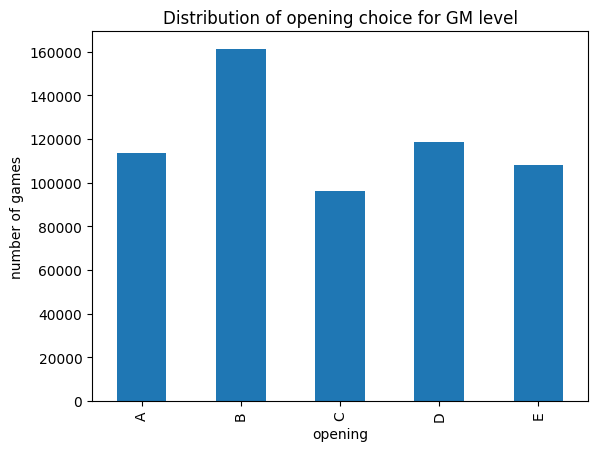

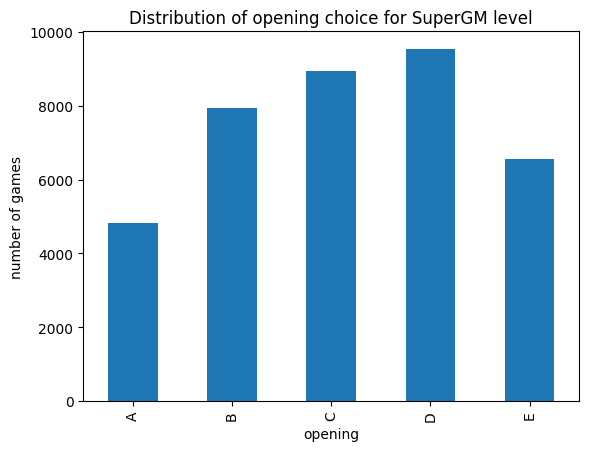

In [6]:
# check difference in opening choose
games_df.loc[games_df['elo_average'].between(2450, 2650) & (games_df['control'] == 'slow'),
             'opening'
            ].value_counts().sort_index().plot.bar()
plt.ylabel('number of games')
plt.title('Distribution of opening choice for GM level')
plt.show()

games_df.loc[games_df['elo_average'].between(2650, 3000) & (games_df['control'] == 'slow'),
             'opening'
            ].value_counts().sort_index().plot.bar()
plt.ylabel('number of games')
plt.title('Distribution of opening choice for SuperGM level')
plt.show()

H_0 : нет разницы в предпочтениях дебютов между партиями уровня гроссмейстеров и супергроссмейстеров в классическом временном контроле\
H_1 : предпочтения дебютов в классическом временном контроле для партий уровня гроссмейтеров и супергроссмейтеров зависят от уровня партии

В факторной таблице по строкам будут уровни партий (GM иди SuperGM), а по столбцам - дебюты

Применим критерий $\chi^2$ к факторной таблице, чтобы проверить гипотезу

In [10]:
opening_preference_table = np.empty(5)
bins   = [2450, 2650, 3000]

for bin_idx in range(len(bins) - 1):
    opening_preference_table = np.vstack((opening_preference_table,
                                          games_df.loc[games_df['elo_average'].between(bins[bin_idx],
                                                                                       bins[bin_idx + 1]
                                                                                      ) &
                                                       (games_df['control'] == 'slow'),
                                                       'opening'
                                                       ]
                                          .value_counts()
                                          .sort_index()
                                          .to_numpy()
                                         )
                                        )
    
opening_preference_table = opening_preference_table[1:]

In [11]:
chi2_contingency(opening_preference_table)


        Are X and Y independent. 
        H0: X and Y are independent
        H1: X and Y are dependent
        Statistics value: 2974.471053275367. Critical value: 9.487729036781154
        P-value: 0.0, 
        Verdict: Reject H0 at significance level 0.05
        

**Заключение**: Поскольку мы отвергаем H0, можно сделать вывод, что предпочтения дебютов в классическом временном контроле для партий уровня гроссмейтеров и супергроссмейтеров зависят от уровня партии

Теперь проверьте влияет ли выбор между открытым и закрытым началом:

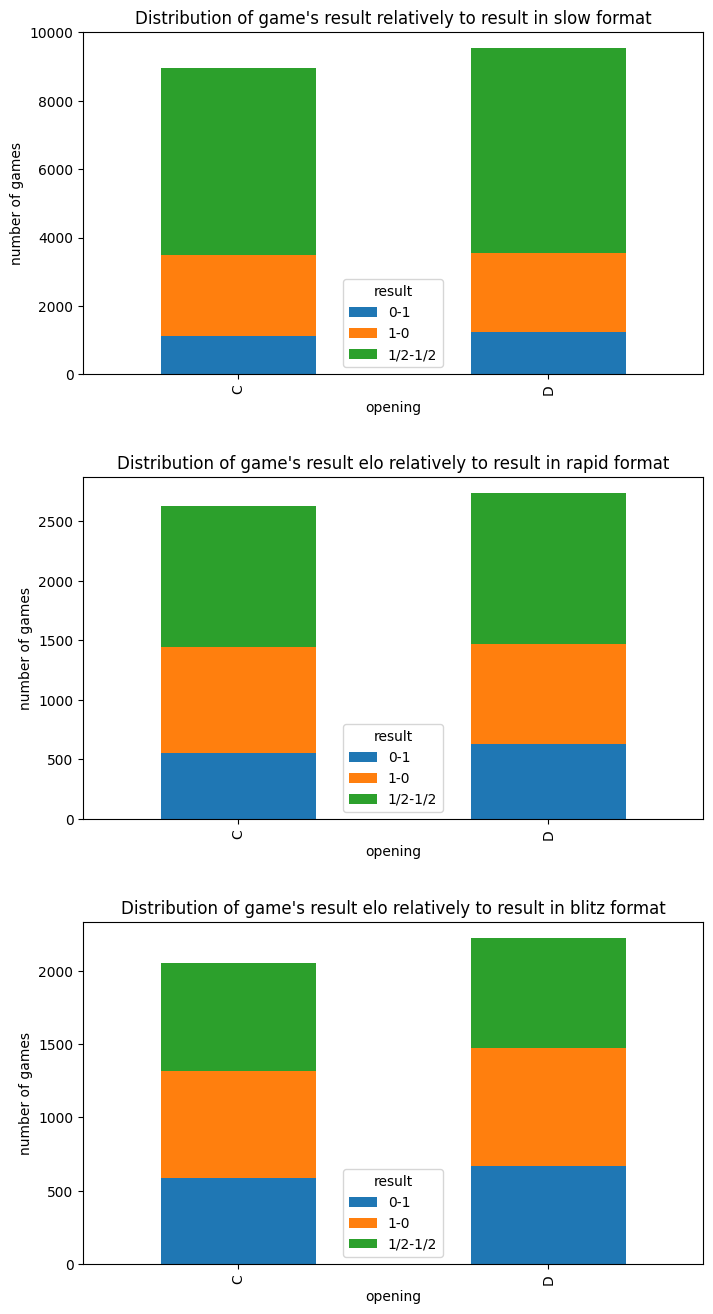

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(8, 16))

axs[0].set_title('Distribution of game\'s result relatively to result in slow format')
axs[1].set_title('Distribution of game\'s result elo relatively to result in rapid format')
axs[2].set_title('Distribution of game\'s result elo relatively to result in blitz format')

for idx, control_type in enumerate(['slow', 'rapid', 'blitz']):
    (games_df
     .loc[(games_df['control'] == control_type) & (games_df['opening'].isin(['C', 'D'])) &
          games_df['elo_average'].between(2650, 3000)
         ]
     .groupby(['opening', 'result'])
     .size()
     .unstack(fill_value=0)
     .plot(kind='bar', stacked=True, ax=axs[idx])
    )
    axs[idx].set_ylabel('number of games')
    axs[idx].set_xlabel("opening")
    
plt.subplots_adjust(hspace=0.3)

plt.show()

H_0 : результат партии не зависит от открытого или зарытого начала партии\
H_1 : результат партии зависит от открытого или закрытого начала партии

В факторной таблице по строкам будут открытое и закрытое начала, а по столбцам - исходы партий

Применим критерий $\chi^2$ к факторной таблице, чтобы проверить гипотезу

In [13]:
opened_closed_opening_table = np.empty(3)

for opening_type in ['C', 'D']:
     opened_closed_opening_table = np.vstack((opened_closed_opening_table,
                                              games_df.loc[(games_df['opening'] == opening_type) &
                                                           games_df['elo_average'].between(2650, 3000),
                                                           'result'
                                                          ]
                                              .value_counts()
                                              .sort_index()
                                              .to_numpy()
                                             )
                                            )
    
opened_closed_opening_table = opened_closed_opening_table[1:]

In [14]:
chi2_contingency(opened_closed_opening_table)


        Are X and Y independent. 
        H0: X and Y are independent
        H1: X and Y are dependent
        Statistics value: 10.277565492542397. Critical value: 5.991464547107979
        P-value: 0.0058648243494315855, 
        Verdict: Reject H0 at significance level 0.05
        

**Заключение**: Поскольку мы отвергаем H0, можно сделать вывод, что  результат партии все же зависит от открытого или закрытого начала партии

Что изменится если брать уровень значимости 0.01? А если брать уровень значимости 0.1? Дайте ответы на эти вопросы и напишите интерпретацию полученных результатов.

**Заключение**: Ничего не изменится, поскольку значения статистики и pvalue не зависят от уровня значимости, а pvalue для обоих гипотез равно ~0.005, то есть при уровнях значимости 0.01 и 0.1 мы все равно отвергнем H0

## Задача 4. Исследование длин партий в разных формах временного контроля (10 баллов)

Попробуйте разобраться в том, какому распределению следуют длительности партий в формате рапид. Выберете несколько распределений и попробуйте оценить их параметры. Постройте гистограммы на которых изображено распределение длительности партий и теоретические плотности распределений с оценёнными параметрами. 

Для оценки параметров распределений можно использовать метод ``fit()`` класса ``scipy.rv_continious()``.

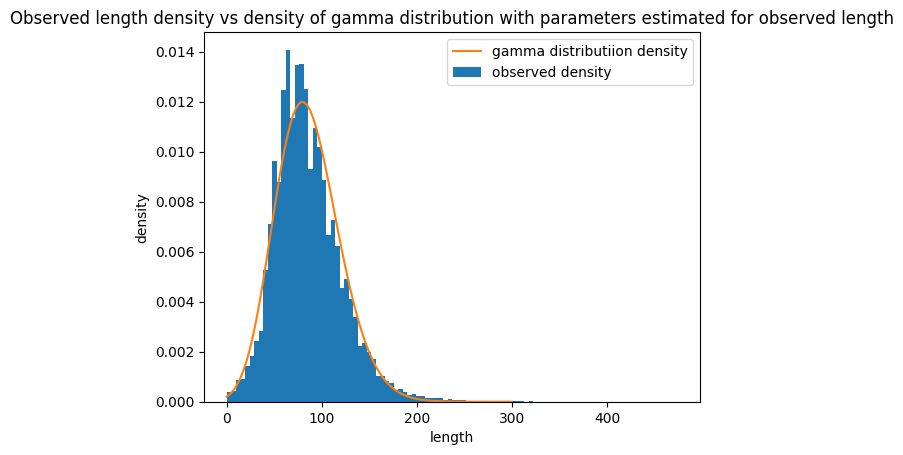

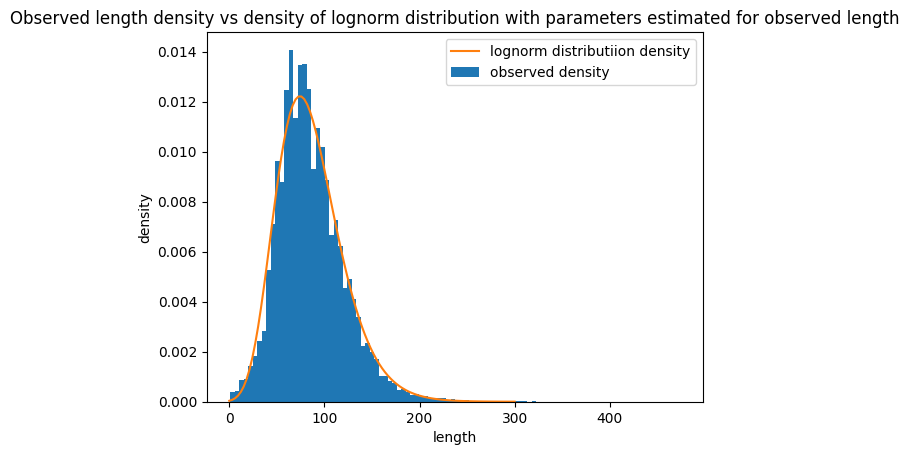

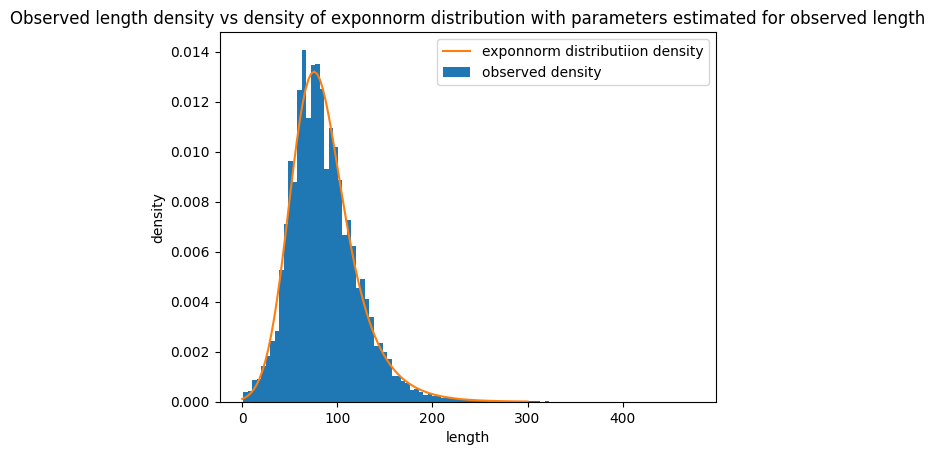

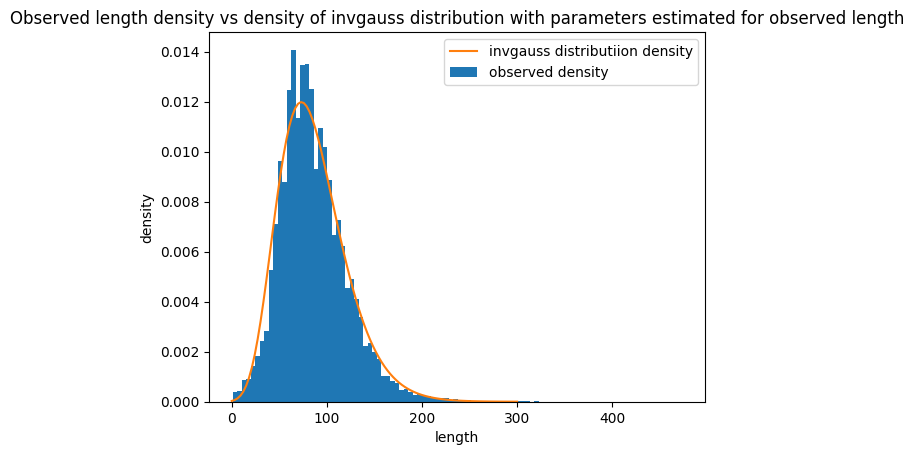

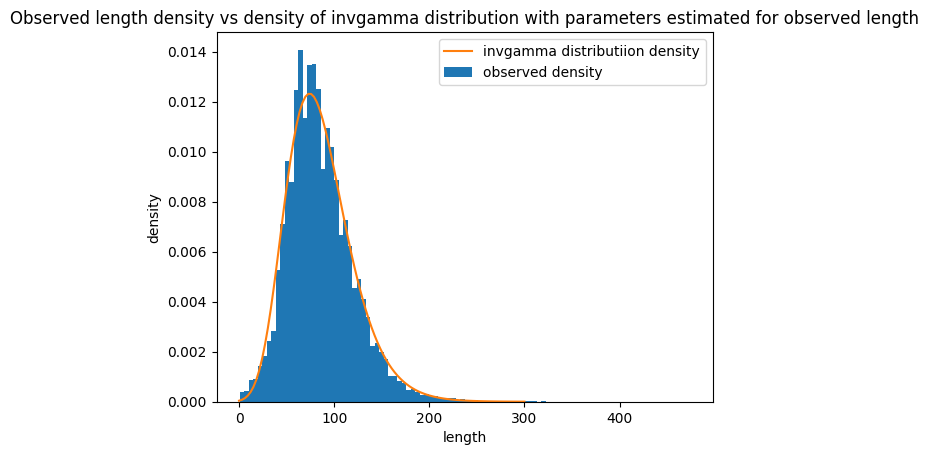

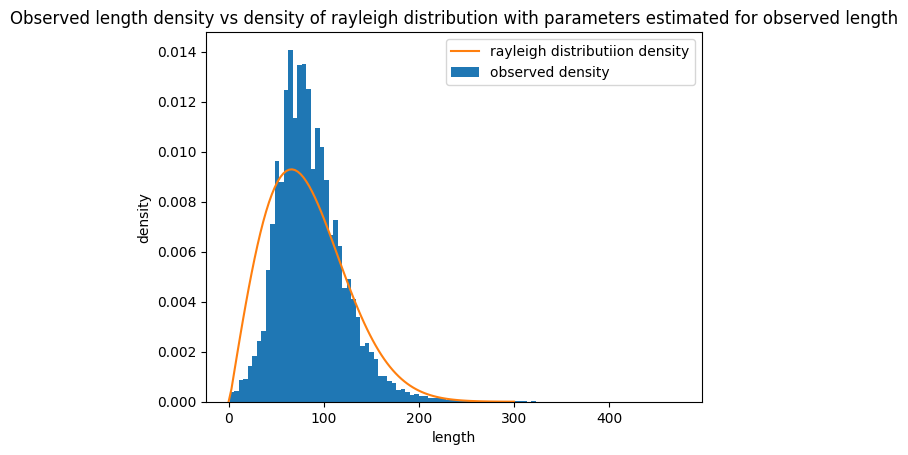

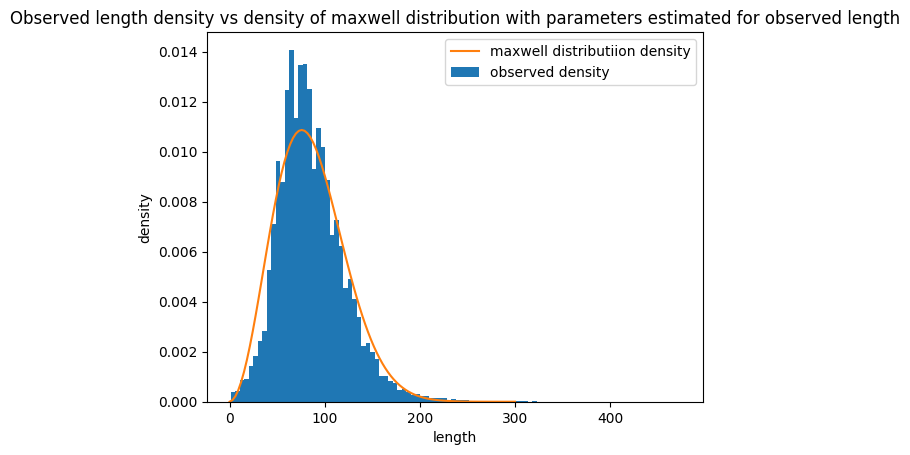

In [7]:
from scipy.stats import gamma, lognorm, exponnorm, invgauss, invgamma, rayleigh, maxwell

rapid_durations = games_df.loc[games_df['control'] == 'rapid', 'length'].values

distributions = [gamma, lognorm, exponnorm, invgauss, invgamma, rayleigh, maxwell]
fitted_distributions = []

for distribution in distributions:
    plt.hist(rapid_durations, bins=100, density=True)
    if distribution.name == 'rayleigh' or distribution.name == 'maxwell':
        fitted_distributions.append(distribution(distribution.fit(rapid_durations)[0],
                                                 distribution.fit(rapid_durations)[1]
                                                )
                                   )
        plt.plot(np.linspace(0, 300, 100), fitted_distributions[-1].pdf(np.linspace(0, 300, 100)))
        plt.ylabel('density')
        plt.xlabel('length')
        plt.title(f'Observed length density vs density'
        f' of {distribution.name} distribution with parameters estimated for observed length'
        )
        plt.legend((f'{distribution.name} distributiion density', 'observed density'))
        plt.show()
        continue
        
    
    fitted_distributions.append(distribution(distribution.fit(rapid_durations)[0],
                                             loc=distribution.fit(rapid_durations)[1],
                                             scale=distribution.fit(rapid_durations)[2]
                                            )
                               )
    plt.plot(np.linspace(0, 300, 100), fitted_distributions[-1].pdf(np.linspace(0, 300, 100)))
    plt.ylabel('density')
    plt.xlabel('length')
    plt.title(f'Observed length density vs density'
    f' of {distribution.name} distribution with parameters estimated for observed length'
    )
    plt.legend((f'{distribution.name} distributiion density', 'observed density'))
    plt.show()

Выберите три наиболее на ваш взгляд подходящих распределения и постройте для них Q-Q график. Подробнее про Q-Q графики можно прочитать [здесь](https://habr.com/ru/articles/578754/) (обратите внимание, что в статье делается упор на Q-Q графики относительно нормального распределения --- вам же нужно построить графики относительно распределений, параметры которых вы оценили).

In [8]:
def qqplot(data : ArrayLike, distribution: stats.rv_continuous,  quantiles : int,  ax : plt.axis) -> plt.axis:
    """
        Plots Q-Q plot agains theoretical distribution. 
        
        Parameters
        ----------
        data : ArrayLike
            sample data
        distribution: stats.rv_continuous
            theoretical distribution agains which quantiles will be plotted
        quantiles: int
            number of quantiles (must be less than size of the data)
        ax: plt.axis
            PyPlot Axis object, on which QQ-plot should be plotted
            
        Returns
        -------
        ax: plt.axis 
            PyPlot Axis object with QQ-plot
    """
    empirical_quantiles = [np.percentile(np.sort(data), 100 * quantile_idx / quantiles)
                           for quantile_idx in range(1, quantiles)]
    theoretical_quantiles = [distribution.ppf(quantile_idx / quantiles)
                             for quantile_idx in range(1, quantiles)]
    ax.plot(np.arange(empirical_quantiles[0], empirical_quantiles[-1] + 1),
            np.arange(empirical_quantiles[0], empirical_quantiles[-1] + 1),
            color='black',
            zorder=1
           )
    ax.scatter(empirical_quantiles, theoretical_quantiles, color='red', zorder=2)
    ax.set_xlabel('empirical quantiles')
    ax.set_ylabel('theoretical quantiles')
    
    return ax

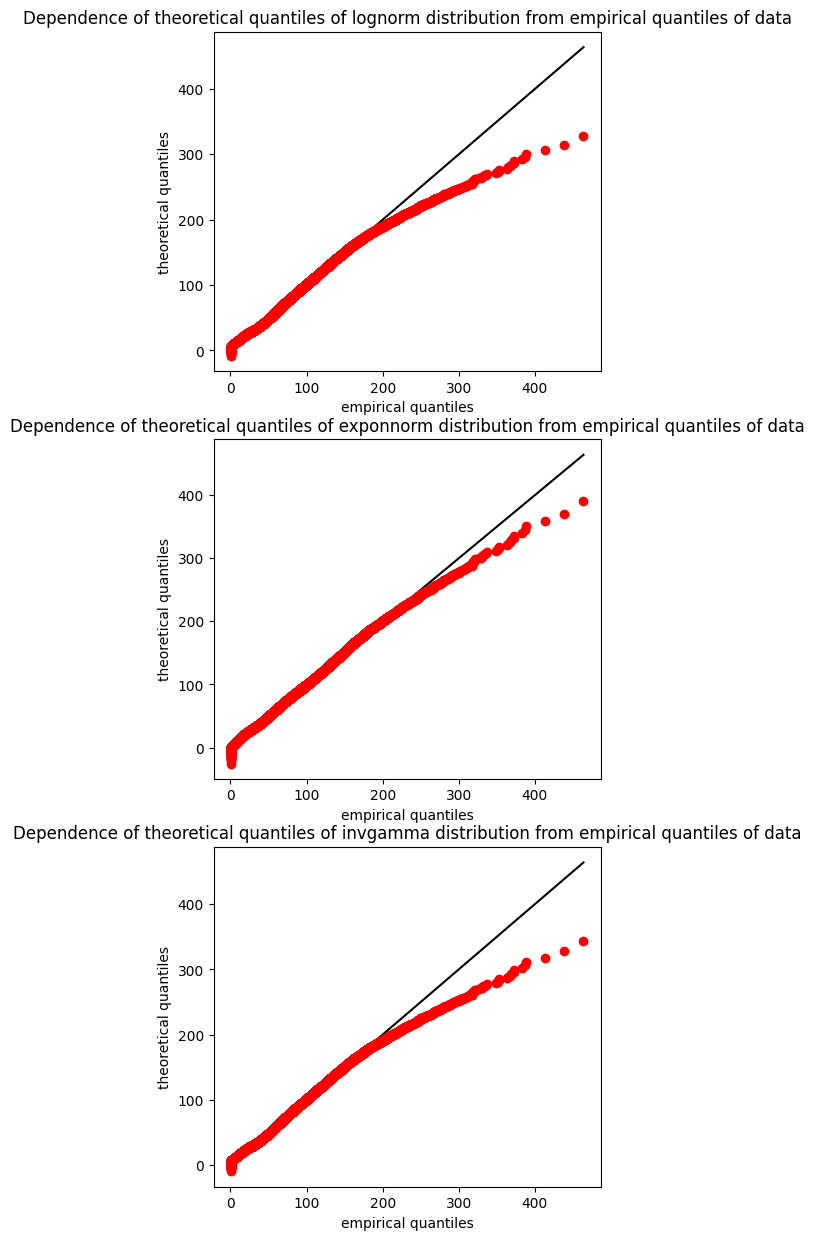

In [10]:
fig, axs = plt.subplots(3, 1, figsize = (5, 15))
axs[0] = qqplot(rapid_durations, fitted_distributions[1], len(rapid_durations), axs[0]) #lognorm
axs[0].set_title(f'Dependence of theoretical quantiles of lognorm distribution'
                 ' from empirical quantiles of data'
                )
axs[1] = qqplot(rapid_durations, fitted_distributions[2], len(rapid_durations), axs[1]) #exponnorm
axs[1].set_title(f'Dependence of theoretical quantiles of exponnorm distribution'
                 ' from empirical quantiles of data'
                )
axs[2] = qqplot(rapid_durations, fitted_distributions[4], len(rapid_durations), axs[2]) #invgamma
axs[2].set_title(f'Dependence of theoretical quantiles of invgamma distribution'
                 ' from empirical quantiles of data'
                )

plt.show()

 На основе всего выше сделанного выберете одно распределение, которое вам кажется наиболее подходящим. После того как вы выбрали распределение $F_0$, проверьте соответствующую гипотезу согласия. Конкретнее, проверьте гипотезу
$$
H_0: X_1,..,X_n \sim F_0
$$
против альтернативы
$$
H_A: X_1,..,X_n \nsim F_0
$$


Такую гипотезу часто проверяют с помощью статистики критерия Колмогорова-Смирнова:
$$
D = \sqrt{n} \sup_x \vert F_{0} - \hat{F}(x)\vert,
$$
где $\hat{F}$ -- эмпирическая функция распределения, которая задётся как
$$
\hat{F}(x) = \frac{1}{n}\sum_{i=1}^n \mathbb{1}(X_i \leq x).
$$
Выражение $1(условие)$ равно $1$, если условие верно и $0$ в противном случае -- так выше считается количество элементов выборки $\leq x$. Статистика $D$ при больших $n$ (сотен уже достаточно) имеет распределение Колмогорова, так что можно построить критерий для проверки. Чтобы упростить техническую часть с подсчётом $D$, воспользуйтесь готовым тестом из пакета scipy.stats.

In [71]:
#exponnorm is the best fitted distribution
stats.kstest(rapid_durations, fitted_distributions[2].cdf, N=len(rapid_durations), alternative='two-sided')

KstestResult(statistic=0.016403099778992902, pvalue=1.3085931881751849e-24, statistic_location=71, statistic_sign=1)

Объясните, почему получилось такое значение несмотря на то, что подобранное вами распределение достаточно неплохо описывает данные? Подумайте, можно ли как-то изменить процедуру проверки для того чтобы можно было воспользоваться этим тестом? Обратите внимание на две вещи:
1. Как считается статистка критерия КС и почему для наших данных эмпирическая функция распределения никогда не будет сходится к функции распределения выбранного вами распределения? Как можно сделать дискретные данные  не-дискретными?\
Поскольку данные дискретны, эмпирическая функция распределения для них всегда будет ступенчатой и мы не сможем достаточно хорошо приблизить ей непрерывную функцию распределения
2.  Обратите внимание на выброс в данных в районе где достигается значение статистики критерия (statistic location). С чем может быть связан этот выброс и как можно было бы его устранить?

Опишите и реализуйте измененную процедуру. 